Importing the Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 
from PIL import Image
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras 
from keras.datasets import mnist 
from tensorflow.math import confusion_matrix 

Loading the Data

In [2]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

Checking the Data

In [3]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Standardizing the Data

In [5]:
x_train = x_train/255
x_test = x_test/255

Defining the Model Architecture

In [6]:
models = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(200, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(25, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])

Compiling the Model

In [7]:
models.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001), loss = keras.losses.SparseCategoricalCrossentropy(), metrics =['accuracy'])

Fitting the Model

In [9]:
models.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0264 - accuracy: 0.9915
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0218 - accuracy: 0.9933
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0206 - accuracy: 0.9933
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0176 - accuracy: 0.9943
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0185 - accuracy: 0.9941
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0156 - accuracy: 0.9950
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0151 - accuracy: 0.9952
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0153 - accuracy: 0.9952
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0140 - accuracy: 0.9960
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

Evaluating the Model

In [10]:
loss, accuracy = models.evaluate(x_test, y_test)
print(accuracy)

313/313 [==============================] - 7s 4ms/step - loss: 0.1182 - accuracy: 0.9797
0.9797000288963318


Model Prediction for Test Data

In [11]:
y_pred = models.predict(x_test)
y_predLabel = [np.argmax(i) for i in y_pred]

313/313 [==============================] - 1s 4ms/step


In [14]:
conf_mat = confusion_matrix(y_test, y_predLabel)
print(conf_mat)

tf.Tensor(
[[ 972    0    0    0    1    0    2    0    2    3]
 [   1 1127    3    1    0    0    1    0    2    0]
 [   5    0 1016    4    1    0    0    3    3    0]
 [   1    0    5  990    0    4    0    3    3    4]
 [   0    0    5    0  965    0    2    0    1    9]
 [   2    0    1   11    2  861    3    0    2   10]
 [   2    3    5    1    5    6  935    0    1    0]
 [   1    1   11    0    1    0    0 1000    4   10]
 [   5    0    2    9    2    4    0    4  943    5]
 [   0    2    0    3   10    2    1    1    2  988]], shape=(10, 10), dtype=int32)


Viewing True Label vs Predicted Label

Text(114.0, 0.5, 'Predicted Label')

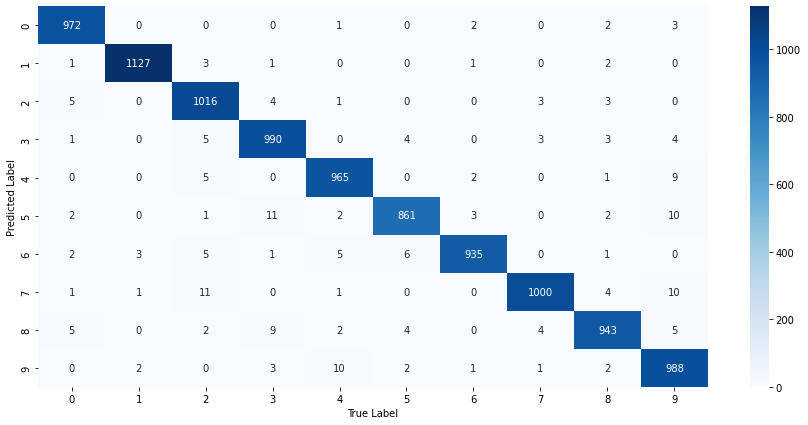

In [15]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, fmt = 'd', cmap = 'Blues', annot = True)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

Building a Predictive System

1/1 [==============================] - 0s 48ms/step
The Handwritten Digit: 3


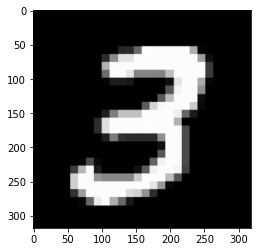

In [17]:
input_image = input('Enter the name of the image: ')
input_img = cv2.imread(input_image)
plt.imshow(input_img)
input_gray = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)
input_resized = cv2.resize(input_gray, (28,28))
input_resized = input_resized/255
input_reshaped = np.reshape(input_resized, [1,28,28])

prediction = models.predict(input_reshaped)
predictionLabel = [np.argmax(prediction)]
print(f'The Handwritten Digit: {predictionLabel[0]}')
